<a href="https://colab.research.google.com/github/Kiranmayee714/Customer-Churn-Prediction-/blob/main/Customer_Churn_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_excel("/content/sample_data/Telco_customer_churn (1).xlsx")

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.shape

(7043, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.drop(columns=['CustomerID'],inplace=True)
df.drop(columns=['Latitude'],inplace=True)
df.drop(columns=['Longitude'],inplace=True)

In [ ]:
df.drop(columns=['Lat Long'],inplace=True)

In [ ]:
df.head()

,Count,Country,State,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,1,United States,California,Los Angeles,90003,Male,No,No,No,2,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,Female,No,No,Yes,2,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,1,United States,California,Los Angeles,90006,Female,No,No,Yes,8,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,1,United States,California,Los Angeles,90010,Female,No,Yes,Yes,28,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,1,United States,California,Los Angeles,90015,Male,No,No,Yes,49,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,3555
Female,3488


In [ ]:
df['Senior Citizen'].value_counts()

,count
Senior Citizen,
No,5901
Yes,1142


In [ ]:
df['Senior Citizen'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
for col in df.columns:
  if col not in ['Tenure Months','Monthly Charges','Total Charges']:
   print(col)
   print(df[col].unique())
   print('-'*80)

Count
[1]
--------------------------------------------------------------------------------
Country
['United States']
--------------------------------------------------------------------------------
State
['California']
--------------------------------------------------------------------------------
City
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
--------------------------------------------------------------------------------
Zip Code
[90003 90005 90006 ... 96128 96134 96146]
--------------------------------------------------------------------------------
Gender
['Male' 'Female']
--------------------------------------------------------------------------------
Senior Citizen
['No' 'Yes']
--------------------------------------------------------------------------------
Partner
['No' 'Yes']
--------------------------------------------------------------------------------
Dependents
['No' 'Yes']
-----------------------------------------------

In [ ]:
df.isnull().sum()

,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0


In [ ]:
for col in ['Tenure Months','Monthly Charges','Total Charges']:
  print(col, (df[col]==" ").sum())
  print('-'*50)

Tenure Months 0
--------------------------------------------------
Monthly Charges 0
--------------------------------------------------
Total Charges 11
--------------------------------------------------


In [ ]:
df['Total Charges']= df['Total Charges'].replace(" ", "0.0").astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Gender             7043 non-null   object 
 6   Senior Citizen     7043 non-null   object 
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

In [ ]:
df['Churn Label'].value_counts()

,count
Churn Label,
No,5174
Yes,1869


In [ ]:
# @title Exploratory Data Analysis


df.shape

(7043, 29)

In [ ]:
df.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.describe()

,Count,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [ ]:
def plot_distribution(df, column_name):
  plt.figure(figsize=(10, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(df[column_name], kde=True)
  plt.title(f'Distribution of {column_name}')

  col_mean = df[column_name].mean()
  col_median = df[column_name].median()
  plt.axvline(col_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {col_mean:.2f}')
  plt.axvline(col_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {col_median:.2f}')

  plt.legend()

  plt.subplot(1, 2, 2)
  sns.boxplot(y=df[column_name])
  plt.title(f'Boxplot of {column_name}')
  plt.show()


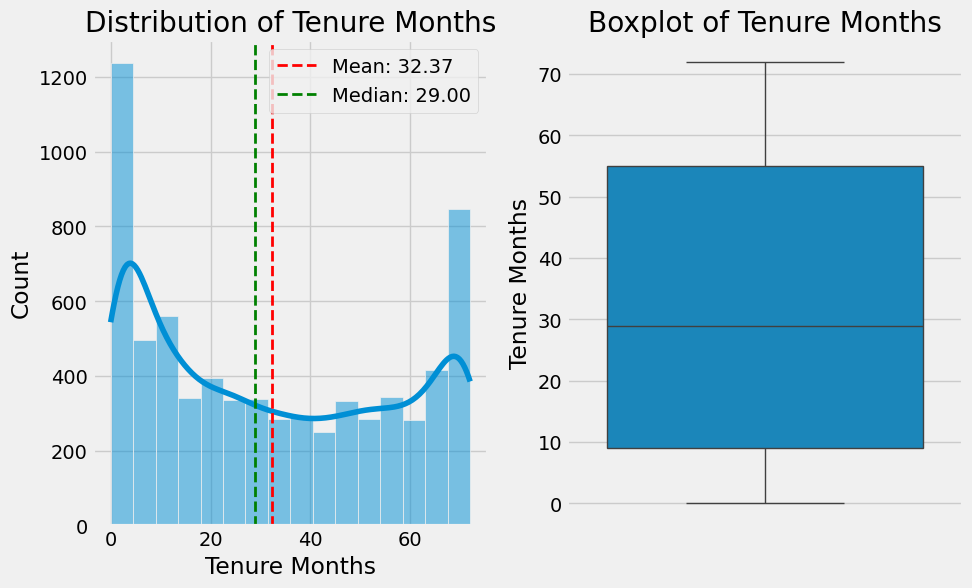

In [ ]:
plot_distribution(df, "Tenure Months")

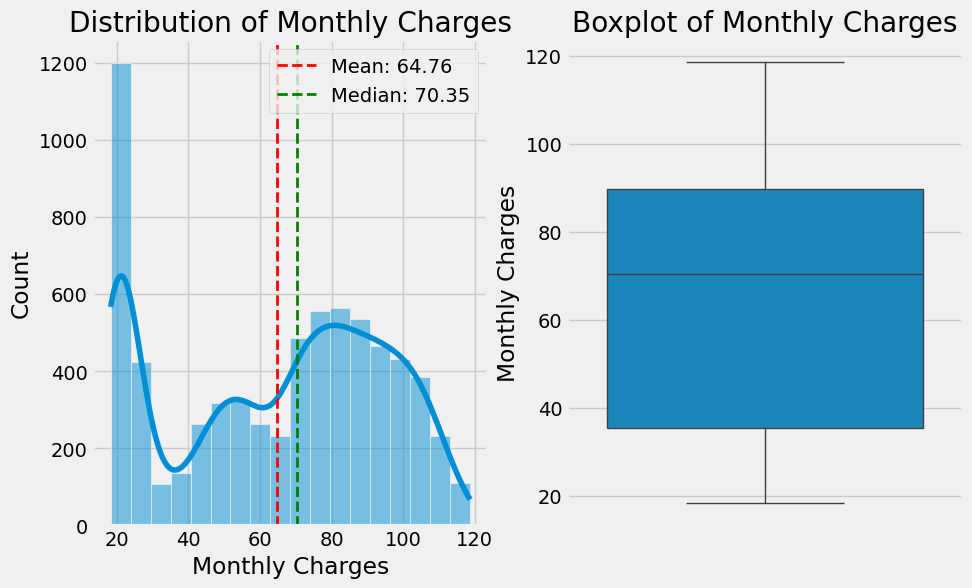

In [ ]:
plot_distribution(df, "Monthly Charges")

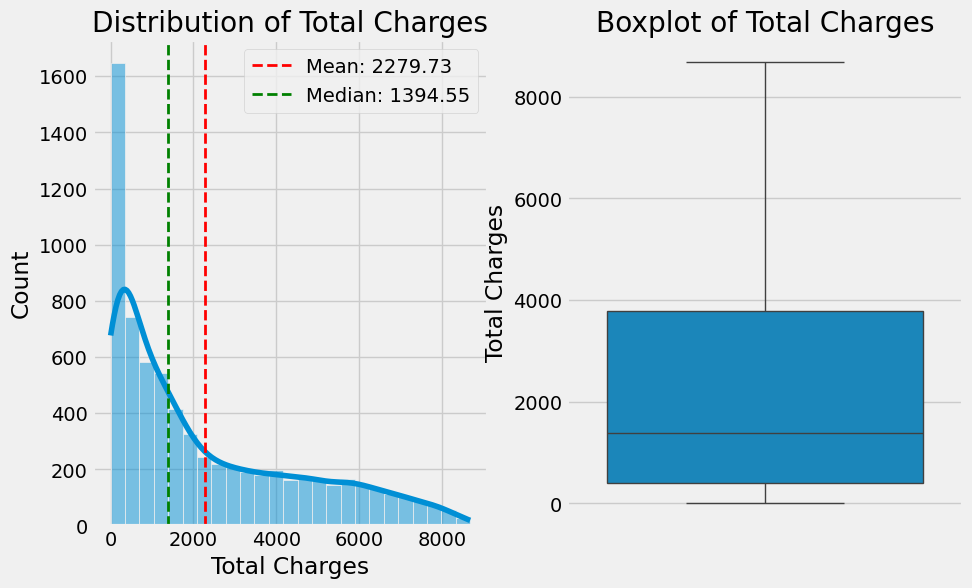

In [ ]:
plot_distribution(df, "Total Charges")

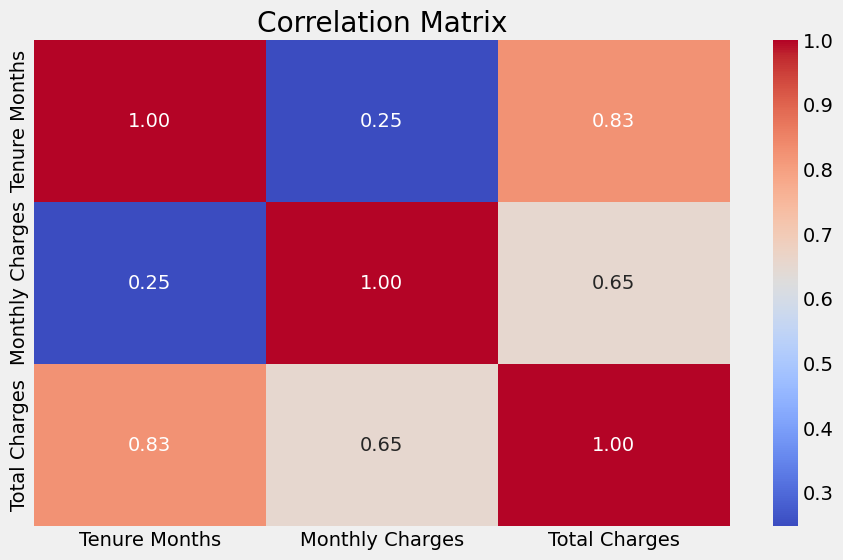

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Tenure Months', 'Monthly Charges', 'Total Charges']].corr(), annot=True, cmap ="coolwarm" ,fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

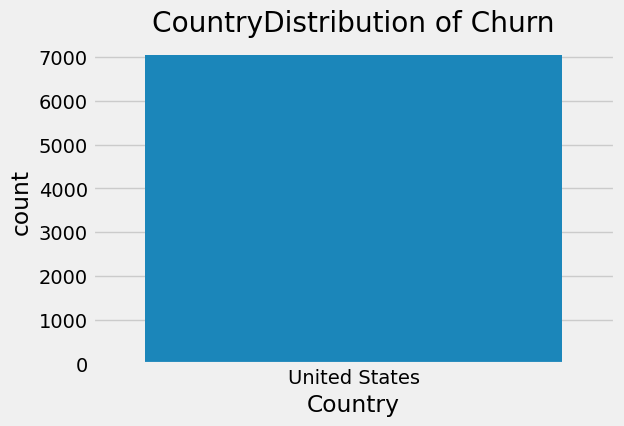

--------------------------------------------------


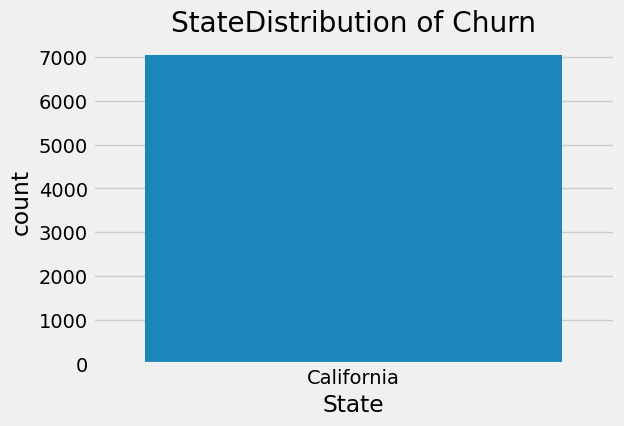

--------------------------------------------------


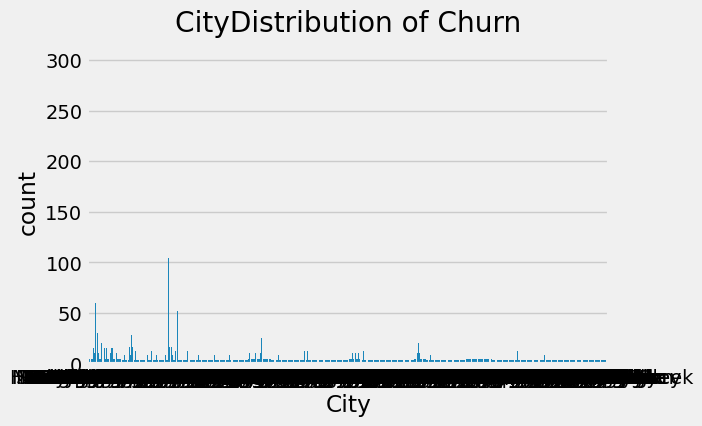

--------------------------------------------------


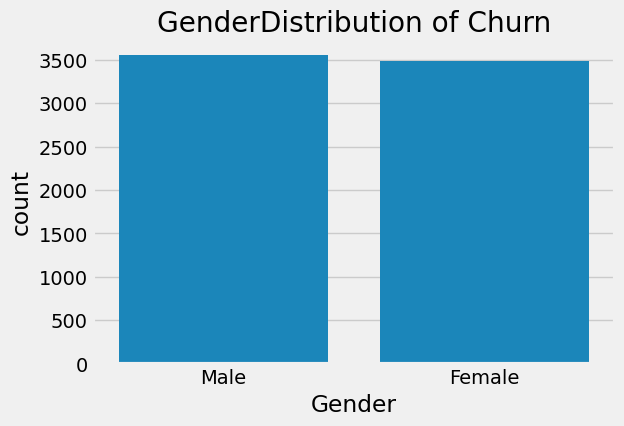

--------------------------------------------------


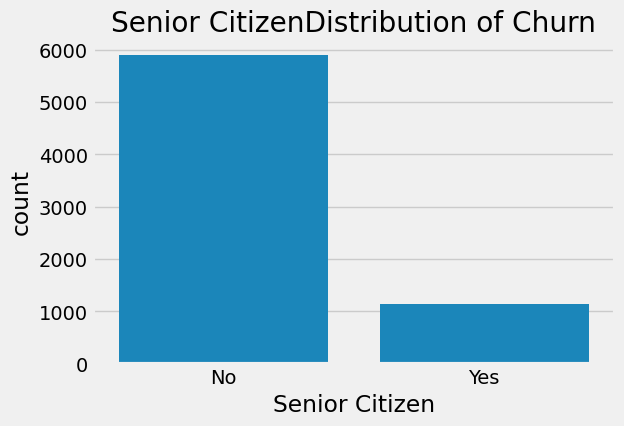

--------------------------------------------------


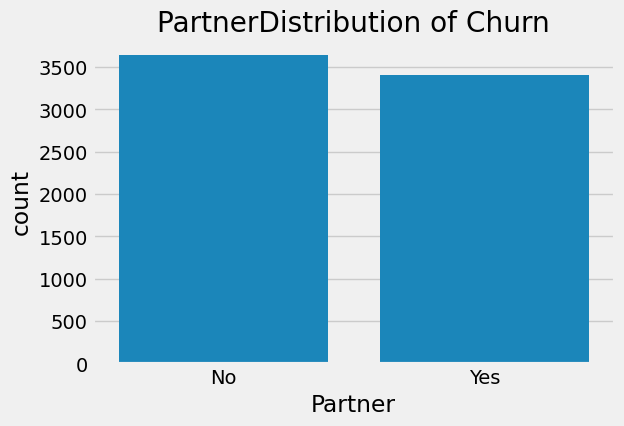

--------------------------------------------------


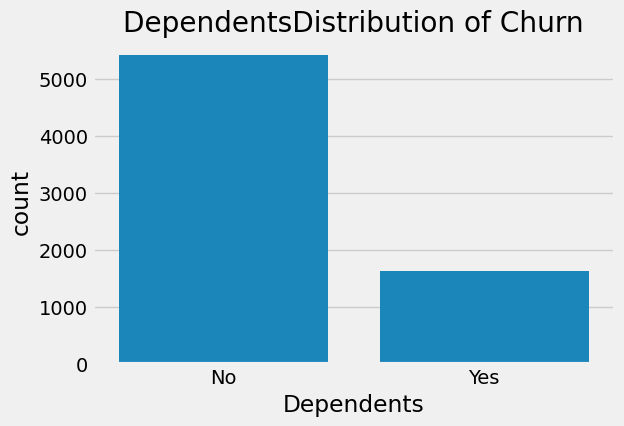

--------------------------------------------------


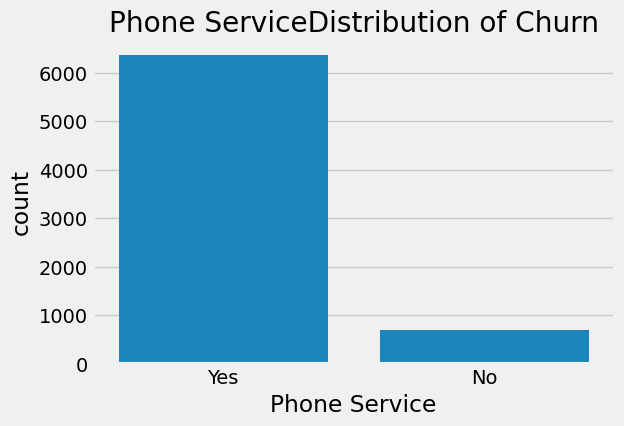

--------------------------------------------------


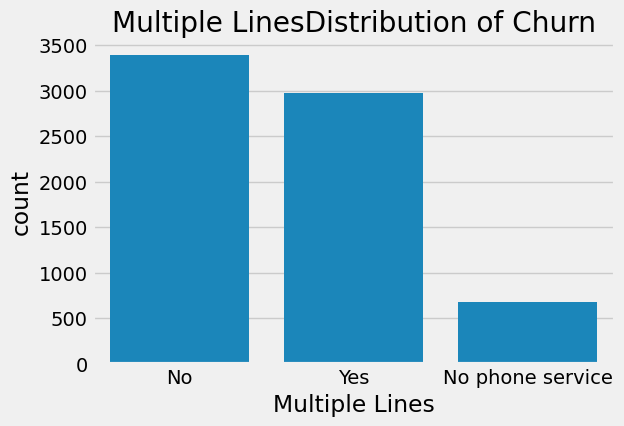

--------------------------------------------------


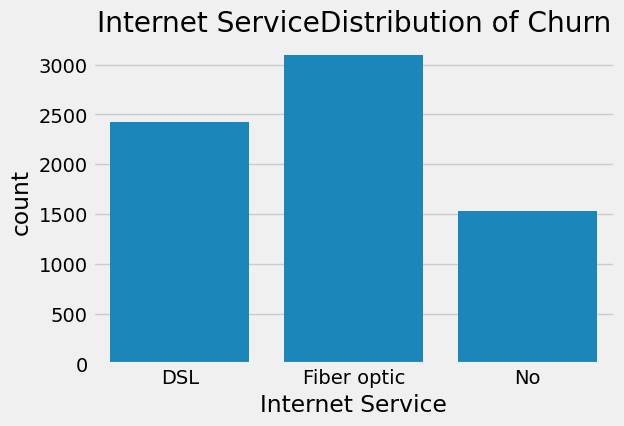

--------------------------------------------------


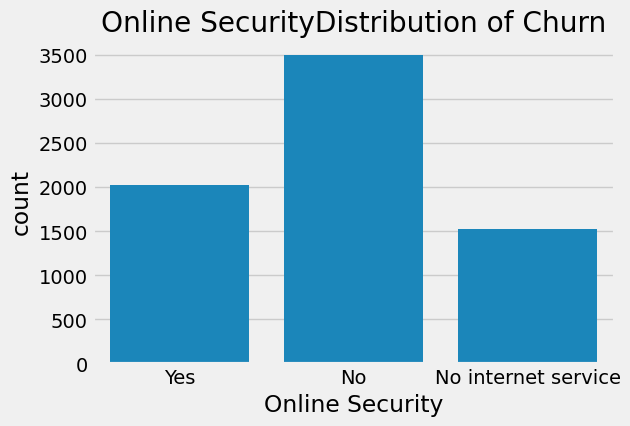

--------------------------------------------------


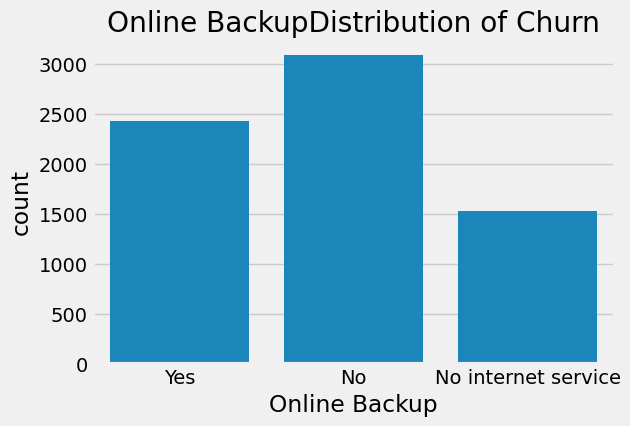

--------------------------------------------------


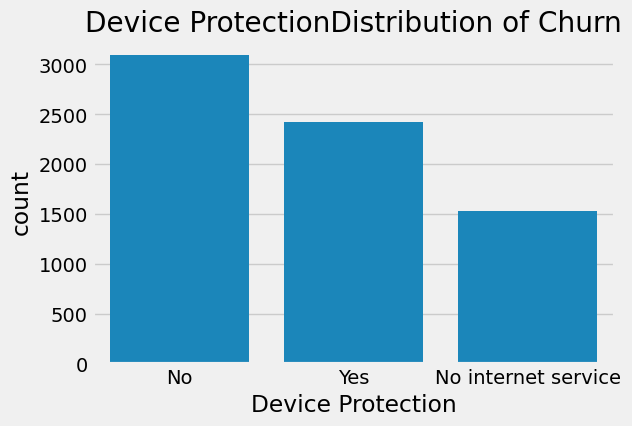

--------------------------------------------------


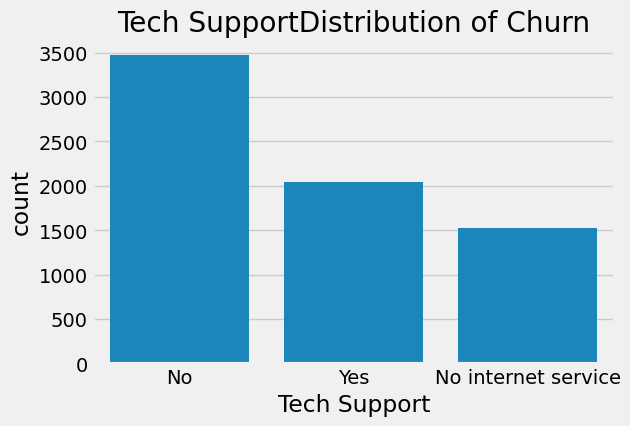

--------------------------------------------------


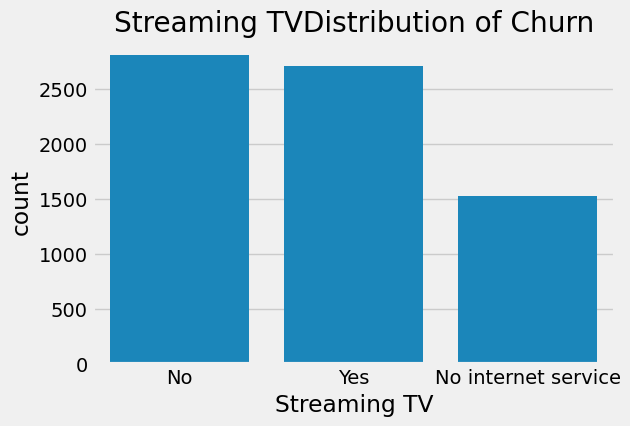

--------------------------------------------------


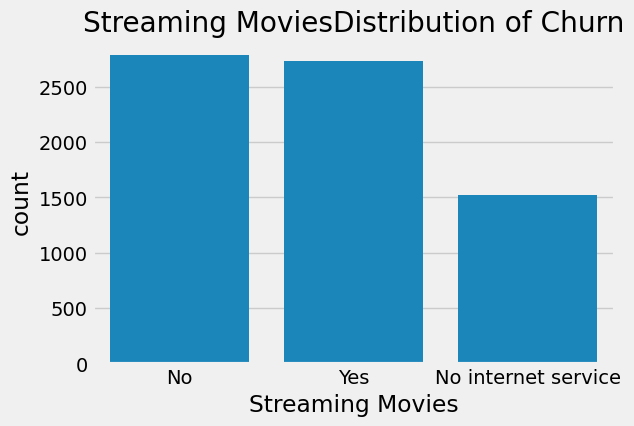

--------------------------------------------------


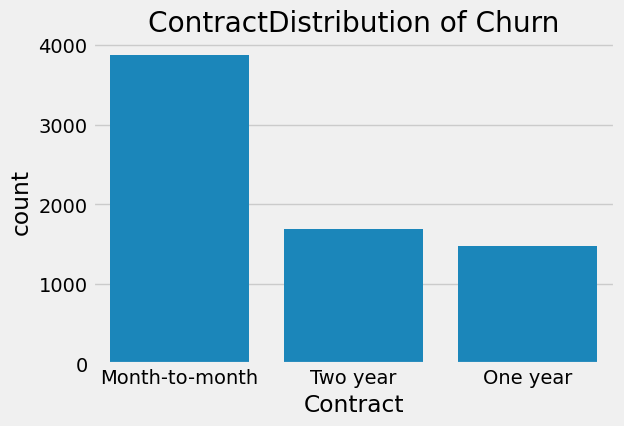

--------------------------------------------------


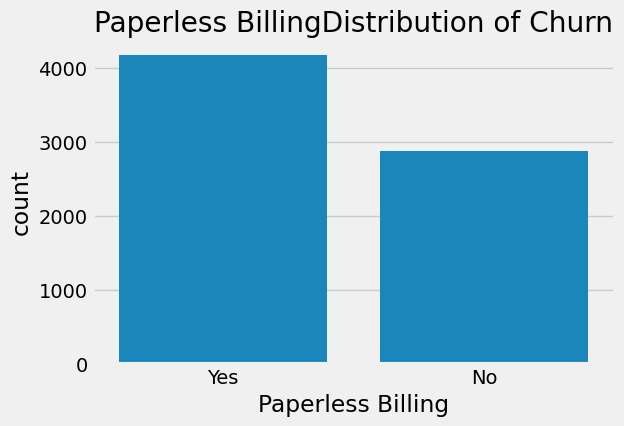

--------------------------------------------------


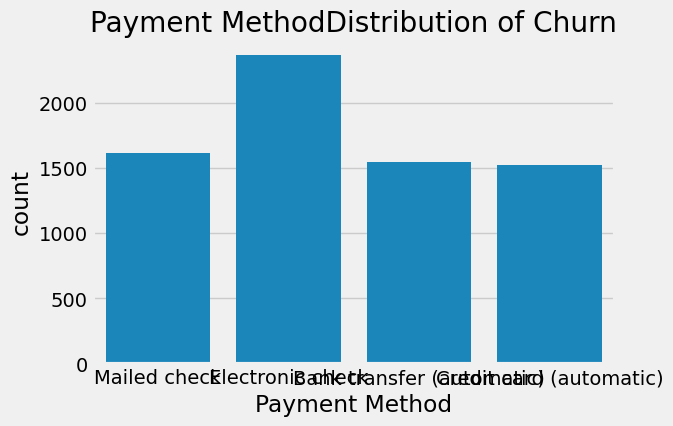

--------------------------------------------------


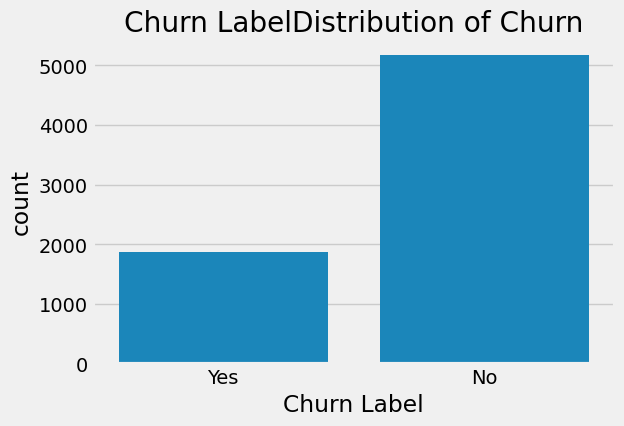

--------------------------------------------------


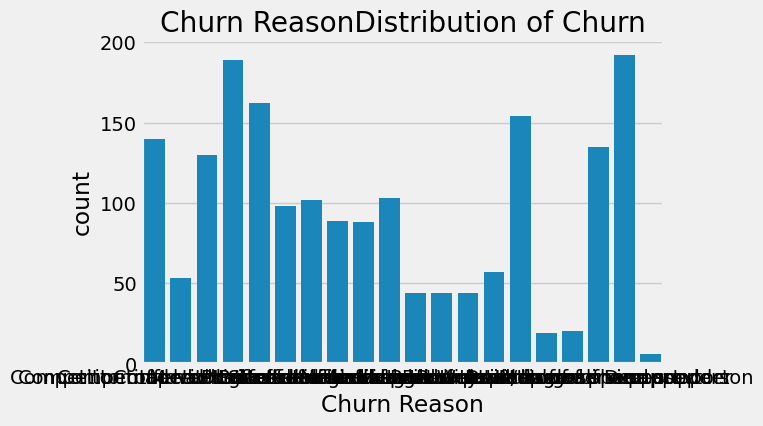

--------------------------------------------------


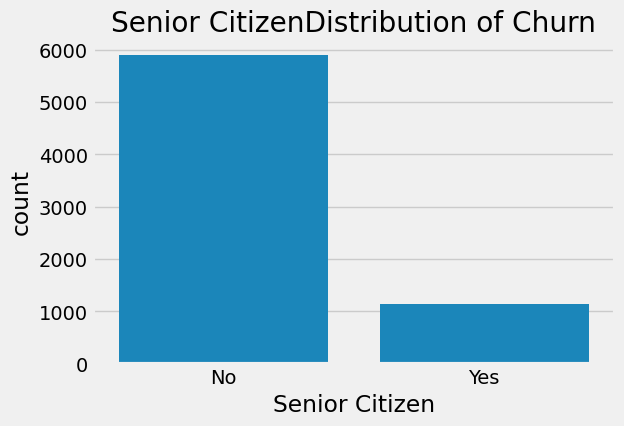

--------------------------------------------------


In [ ]:
categorical_cols = df.select_dtypes(include="object").columns.to_list() + ['Senior Citizen']

for col in categorical_cols:
  plt.figure(figsize=(6, 4))
  #  sns.countplot(x=col, data=df, hue='Churn Label')
  sns.countplot(x = df[col])
  plt.title(f'{col}Distribution of Churn')
  plt.show()
  print('-'*50)

In [ ]:
# Label Encoding
df['Churn Label'] = df['Churn Label'].replace({"Yes": 1, "No": 0})

/tmp/ipython-input-3452541907.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn Label'] = df['Churn Label'].replace({"Yes": 1, "No": 0})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Gender             7043 non-null   object 
 6   Senior Citizen     7043 non-null   object 
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

In [ ]:
objects_columns = df.select_dtypes(include="object").columns

In [ ]:
objects_columns

Index(['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn Reason'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in objects_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


In [ ]:
encoders

{'Country': LabelEncoder(),
 'State': LabelEncoder(),
 'City': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Senior Citizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Phone Service': LabelEncoder(),
 'Multiple Lines': LabelEncoder(),
 'Internet Service': LabelEncoder(),
 'Online Security': LabelEncoder(),
 'Online Backup': LabelEncoder(),
 'Device Protection': LabelEncoder(),
 'Tech Support': LabelEncoder(),
 'Streaming TV': LabelEncoder(),
 'Streaming Movies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'Paperless Billing': LabelEncoder(),
 'Payment Method': LabelEncoder(),
 'Churn Reason': LabelEncoder()}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   int64  
 2   State              7043 non-null   int64  
 3   City               7043 non-null   int64  
 4   Zip Code           7043 non-null   int64  
 5   Gender             7043 non-null   int64  
 6   Senior Citizen     7043 non-null   int64  
 7   Partner            7043 non-null   int64  
 8   Dependents         7043 non-null   int64  
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   int64  
 11  Multiple Lines     7043 non-null   int64  
 12  Internet Service   7043 non-null   int64  
 13  Online Security    7043 non-null   int64  
 14  Online Backup      7043 non-null   int64  
 15  Device Protection  7043 non-null   int64  
 16  Tech Support       7043 

In [ ]:
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df['Churn Label'].value_counts()

,count
Churn Label,
0,5174
1,1869


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']



In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
Churn Label,
0,4165
1,1469


In [ ]:
SMOTE(random_state= 42)

SMOTE(random_state=42)

In [ ]:
smote = SMOTE(random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

,count
Churn Label,
0,4165
1,4165


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
hyperparameters = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3,5,7],
    }
}

In [ ]:
best_models = {}
for model_name, model in models.items():
    print(f"Tunning {model_name}.......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name])
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best Accuracy for {model_name}: {grid.best_score_: .2f}\n")

Tunning Random Forest.......
Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 50}
Best Accuracy for Random Forest:  1.00

Tunning XGBoost.......
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3}
Best Accuracy for XGBoost:  1.00



In [ ]:
best_models

{'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.01, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...)}

In [ ]:
with open('best_models.pkl', 'wb') as f:
    pickle.dump(best_models['Random Forest'],f)

In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
 y_test_pred = best_models['Random Forest'].predict(X_test)
 y_test_prob = best_models['Random Forest'].predict_proba(X_test)[:, 1]

In [ ]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test_prob

array([9.87161294e-01, 5.21336484e-02, 6.47448257e-03, ...,
       3.92197549e-02, 7.10760185e-04, 9.90003549e-01])

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score

print(f"Accuracy: ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred))
print(f"Classification Report \n", classification_report(y_test, y_test_pred))

Accuracy:  1.0
ROC - AUC Score :  1.0
Confusion Matrix: 
 [[1009    0]
 [   0  400]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [ ]:
with open("best_models.pkl", "rb") as f:
    loaded_model = pickle.load(f)
with open ("label_encoders.pkl", "rb") as f:
  encoder = pickle.load(f)
with open("scaler.pkl", "rb") as f:
  scaler = pickle.load(f)

In [ ]:
import numpy as np # Import numpy to use np.nan

def make_prediction(input_data, encoder, scaler):
    input_df = pd.DataFrame([input_data])

    # Handle unseen label in 'Churn Reason' specifically BEFORE general encoding
    if 'Churn Reason' in input_df.columns and input_df['Churn Reason'].iloc[0] == 'Unknown':
        # Replace 'Unknown' with np.nan. Assuming the encoder for Churn Reason was fitted on NaN.
        input_df['Churn Reason'] = np.nan

    for col, enc in encoder.items():
        if col in input_df.columns:
             # Apply transform. This might still fail for other columns with unseen labels
             # if they are not handled. For 'Churn Reason', it will transform the value
             # (either original or NaN).
             input_df[col] = enc.transform(input_df[col])


    numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges']
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

    # Ensure the order of columns matches the training data immediately before prediction
    training_columns = X_train_smote.columns.tolist()
    input_df = input_df.reindex(columns=training_columns, fill_value=0) # Fill any potentially missing columns with 0


    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    return "Churn " if prediction == 1 else "No Churn", probability

In [ ]:
df.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
example_input = {
    'Gender': 'Female',
    'Senior Citizen': 'Yes',
    'Partner': 'Yes',
    'Dependents': 'No',
    'Tenure Months': 1,
    'Phone Service': 'No',
    'Multiple Lines': 'No phone service',
    'Internet Service': 'DSL',
    'Online Security': 'No',
    'Online Backup': 'Yes',
    'Device Protection': 'No',
    'Tech Support': 'No',
    'Streaming TV': 'No',
    'Streaming Movies': 'No',
    'Contract': 'Month-to-month',
    'Paperless Billing': 'Yes',
    'Payment Method': 'Electronic check',
    'Monthly Charges': 29.85,
    'Total Charges': 29.85,
    'Count': 1,
    'Country': 'United States',
    'State': 'California',
    'City': 'Los Angeles',
    'Zip Code': 90003,
    'Churn Value': 0,
    'Churn Score': 0,
    'CLTV': 0,
    'Churn Reason': 'Unknown'
}

In [ ]:
prediction, prob = make_prediction(example_input, encoder, scaler)

In [ ]:
prediction

'No Churn'

In [ ]:
prob

np.float64(0.05213364844715468)

In [ ]:
print(f"Prediction: {prediction}, Probability: {prob:.2f}")

Prediction: No Churn, Probability: 0.05
